In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json


# Data Wrangling

In [ ]:
business_path = "/content/drive/MyDrive/Stat422/Final_Report/yelp_json/yelp_academic_dataset_business.json"

bus_df = []

with open(business_path, "r") as f:
    for line in f:
        data = json.loads(line)
        if data.get("state") == "CA":
            bus_df.append(json.loads(line))

bus_df = pd.DataFrame(bus_df)

bus_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [ ]:
#getting bussiness data and review data only for CA

ca_business_ids = set()

with open(business_path, "r") as f:
    for line in f:
        data = json.loads(line)
        if data.get("state") == "CA":
            ca_business_ids.add(data["business_id"])

print("Number of CA businesses:", len(ca_business_ids))

review_path = "/content/drive/MyDrive/Stat422/Final_Report/yelp_json/yelp_academic_dataset_review.json"

ca_reviews = []

with open(review_path, "r") as f:
    for line in f:
        review = json.loads(line)

        # keep *all columns* and only filter based on CA businesses
        if review["business_id"] in ca_business_ids:
            ca_reviews.append(review)

ca_reviews_df = pd.DataFrame(ca_reviews)

ca_reviews_df.head()

Number of CA businesses: 5203


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
1,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
2,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4.0,0,0,0,"Yes, this is the only sushi place in town. How...",2013-09-04 03:48:20
3,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34
4,L0jv8c2FbpWSlfNC6bbUEA,bFPdtzu11Oi0f92EAcjqmg,IDtLPgUrqorrpqSLdfMhZQ,5.0,0,0,0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47


In [ ]:
ca_reviews_df = ca_reviews_df.drop(columns=['review_id'])


In [ ]:
yelp_cat = pd.read_csv("/content/drive/MyDrive/Stat422/Final_Report/data/yelp_cat.csv")
yelp_cat['Category'] = yelp_cat['Category'].ffill()
yelp_cat = yelp_cat.iloc[1:].reset_index(drop=True)

In [ ]:
yelp_cat[yelp_cat['Category']=='Restaurants']

,Category,Activity,Subcategory
1037,Restaurants,Afghan,NaN
1038,Restaurants,African,Senegalese
1039,Restaurants,NaN,South African
1040,Restaurants,American (New),NaN
1041,Restaurants,American (Traditional),NaN
...,...,...,...
1324,Restaurants,Waffles,NaN
1325,Restaurants,Wok,NaN
1326,Restaurants,Wraps,NaN
1327,Restaurants,Yugoslav,NaN


In [ ]:
restaurant_subcats2 = [
    'Afghan', 'African', 'American (New)', 'American (Traditional)',
    'Andalusian','Argentine', 'Armenian', 'Asian Fusion',
    'Asturian', 'Australian', 'Austrian', 'Bangladeshi', 'Bavarian', 'Beisl', 'Belgian', 'Bistros',
    'Black Sea', 'Brasseries', 'Brazilian',
    'British', 'Bulgarian', 'Burmese', 'Cajun/Creole', 'Cambodian', 'Canadian (New)',
    'Canteen', 'Caribbean', 'Catalan', 'Chilean', 'Chinese', 'Corsican',
    'Creperies', 'Cuban', 'Curry Sausage', 'Cypriot', 'Czech',
    'Czech/Slovakian', 'Danish', 'Delis',
    'Eastern European', 'Eritrean', 'Ethiopian','Fast Food',
    'Filipino', 'Fischbroetchen',
    'Freiduria', 'French',
    'French Southwest', 'Galician',
    'Georgian', 'German', 'Giblets', 'Greek', 'Guamanian',
    'Hawaiian', 'Heuriger', 'Himalayan/Nepalese',
    'Honduran',
    'Hungarian', 'Iberian', 'Indian', 'Indonesian',
    'Irish', 'Island Pub','Italian', 'Japanese', 'Kopitiam', 'Korean', 'Kosher', 'Kurdish', 'Laos',
    'Laotian', 'Latin American','Lyonnais',
    'Malaysian','Mediterranean', 'Mexican',
 'Modern Australian',
    'Modern European', 'Mongolian', 'Moroccan', 'New Mexican Cuisine',
    'New Zealand', 'Nicaraguan', 'Night Food', 'Nikkei',
    'Norcinerie', 'Pakistani',
    'Pan Asian', 'Parma', 'Persian/Iranian', 'Peruvian',
    'Polish', 'Polynesian',
    'Portuguese',
    'Romanian', 'Russian',
    'Scandinavian', 'Scottish',
    'Serbo Croatian', 'Signature Cuisine', 'Singaporean', 'Slovakian',
    'Somali',  'Southern', 'Sri Lankan',
    'Supper Clubs', 'Swabian', 'Swedish', 'Sushi Bars',
    'Swiss Food', 'Syrian', 'Tabernas', 'Taiwanese', 'Tapas Bars',
    'Tavola Calda', 'Thai', 'Turkish',
    'Traditional Norwegian', 'Traditional Swedish', 'Trattorie','Ukrainian', 'Uzbek', 'Venison',
    'Vietnamese', 'Yugoslav'
]



In [ ]:
ca_bus = bus_df[bus_df['city']== "Santa Barbara"]

In [ ]:
ca_bus['categories'] = ca_bus['categories'].apply(
    lambda x: x.split(',') if isinstance(x, str) else x
)

# Split into multiple rows
ca_bus = ca_bus.explode('categories')

# Clean extra spaces
ca_bus['categories'] = ca_bus['categories'].str.strip()

# Drop blank entries
ca_bus = ca_bus[ca_bus['categories'].notna() & (ca_bus['categories'] != '')]
ca_bus = ca_bus.reset_index(drop=True)
#sort categories
ca_bus = ca_bus.sort_values(by='categories')

main_cats = list(yelp_cat['Category'].unique())
sub_cats = list(yelp_cat['Activity'].unique())

ca_bus['categories'].value_counts()

/tmp/ipython-input-566220790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_bus['categories'] = ca_bus['categories'].apply(


,count
categories,
Restaurants,767
Shopping,685
Food,571
Health & Medical,509
Home Services,464
...,...
Wildlife Control,1
Fondue,1
Yelp Events,1


In [ ]:
ca_bus = ca_bus[ca_bus['categories'].isin(restaurant_subcats2)]
ca_bus['categories'].value_counts()
ca_bus['categories'] = ca_bus['categories'].replace('Sushi Bars', 'Japanese')
ca_bus['categories'] = ca_bus['categories'].replace('Turkish', 'Mediterranean')
ca_bus[ca_bus['name']== "Bibi Ji"]['categories'] = "Indian"
ca_bus['categories'].value_counts()


/tmp/ipython-input-1436245150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_bus[ca_bus['name']== "Bibi Ji"]['categories'] = "Indian"


,count
categories,
American (New),151
Mexican,118
American (Traditional),95
Japanese,57
Delis,56
Italian,55
Fast Food,41
Asian Fusion,24
French,23


In [ ]:

def safe_eval(x):
    """Return a dict if parseable, otherwise None."""
    if pd.isna(x):
        return None
    if isinstance(x, dict):
        return x
    try:
        return ast.literal_eval(x)
    except Exception:
        return None

# 1) parse into real dicts
ca_res2 = ca_bus.copy()
ca_res2['hours_dict'] = ca_res2['hours'].apply(safe_eval)

# 2) create a column that is always a list (empty list for missing)
# Each element in the list will be a dict {'index': original_index, 'day': day, 'time': time}
def dict_to_list(row):
    d = row['hours_dict']
    idx = row.name  # or use some id column like row['business_id']
    if not d:
        # return empty list so explode doesn't choke
        return []
    return [{'index': idx, 'day': day, 'time': time} for day, time in d.items()]

ca_res2['hours_list'] = ca_res2.apply(dict_to_list, axis=1)

# 3) explode safely (every cell is guaranteed to be a list)
df_exp = ca_res2[['hours_list']].explode('hours_list', ignore_index=False)  # keep original index
# If your pandas version doesn't support ignore_index, remove that arg.

# 4) build a clean DataFrame from the exploded items
# Rows that were empty lists will produce NaN in 'hours_list' after explode; handle them next
df_exp = df_exp.reset_index()  # move original index into a column named 'index' (optional)
df_exp['hours_list'] = df_exp['hours_list'].apply(lambda x: x if isinstance(x, dict) else None)

# Keep rows with no hours (they'll have hours_list == None). We will create explicit missing rows.
with_hours = df_exp.dropna(subset=['hours_list']).copy()
with_hours[['index', 'day', 'time']] = pd.DataFrame(
    with_hours['hours_list'].tolist(), index=with_hours.index
)

# 5) For businesses with no hours, create rows with nulls
no_hours_idx = set(ca_res2.index) - set(with_hours['index'].unique())
missing_rows = pd.DataFrame({
    'index': list(no_hours_idx),
    'day': [None]*len(no_hours_idx),
    'time': [None]*len(no_hours_idx)
})

# 6) combine
final = pd.concat([
    with_hours[['index', 'day', 'time']],
    missing_rows[['index', 'day', 'time']]
], ignore_index=True, sort=False)

# 7) split time into open/close and compute hours_open (adapt fix_time if needed)
def split_time(t):
    if not isinstance(t, str):
        return (None, None)
    parts = t.split('-')
    if len(parts) != 2:
        return (None, None)
    return tuple(parts)

final[['open_raw', 'close_raw']] = final['time'].apply(lambda t: pd.Series(split_time(t)))

def fix_time(t):
    if not isinstance(t, str):
        return None
    parts = t.split(':')
    if len(parts) == 2:
        h, m = parts
        try:
            return f"{int(h):02d}:{int(m):02d}"
        except:
            return None
    return None

final['open_time'] = final['open_raw'].apply(fix_time)
final['close_time'] = final['close_raw'].apply(fix_time)

# convert to timedeltas and compute hours_open if both times present
final['open_td']  = pd.to_timedelta(final['open_time'].fillna('00:00') + ':00')
final['close_td'] = pd.to_timedelta(final['close_time'].fillna('00:00') + ':00')

# If close < open assume close is next day
mask = final['close_td'] < final['open_td']
final.loc[mask, 'close_td'] += pd.Timedelta(days=1)

final['hours_open'] = (final['close_td'] - final['open_td']).dt.total_seconds() / 3600
# Set hours_open to None where original times were missing
final.loc[final['open_time'].isna() | final['close_time'].isna(), 'hours_open'] = None

# final is ready for export to CSV / Tableau
final = final[['index', 'day', 'open_time', 'close_time', 'hours_open']]


In [ ]:
# Merging
ca_bus = ca_bus.loc[:, ~ca_bus.columns.duplicated(keep='first')]

if 'business_index' in ca_bus.columns:
    ca_bus = ca_bus.drop(columns=['business_index'])

if ca_bus.index.name != 'business_index':
    ca_bus.index.name = 'business_index'

# Now, for 'final':
# Rename the 'index' column to 'business_index' as established in the previous cell.
final = final.rename(columns={'index': 'business_index'})

# Perform the merge operation, merging ca_res on its index
# with final's 'business_index' column.
ca_bus = ca_bus.merge(final, left_index=True, right_on='business_index', how='left')

In [ ]:
# Group Categories with less than 10 restaurents together

# Count how many restaurants per category

cat_counts = ca_res2["categories"].value_counts()

# Categories that occur less than 10 times
rare_cats = cat_counts[cat_counts < 10].index

# Replace rare categories with "Other"

ca_bus['categories_grouped']=ca_bus['categories'].replace(rare_cats, "Other")

In [ ]:
# merge on the review dataset but only business name, address
reviews_per_rest = ca_reviews_df.merge(ca_bus[['business_id', 'name', 'address','postal_code','categories','categories_grouped','review_count','latitude','longitude']], on='business_id', how='right')
reviews_per_rest

#df_unique_rev = ca_reviews_df.merge(df_unique[['business_id', 'name', 'address','postal_code','categories_grouped']], on='business_id', how='right')

,user_id,business_id,stars,useful,funny,cool,text,date,name,address,postal_code,categories,categories_grouped,review_count,latitude,longitude
0,KB3-Y7kTq-iBf_Zhwmj1Cg,NWwVZnCb8-Oh9QWWAb2T2Q,1.0,3,0,1,This is a less than great LA dining experience...,2017-03-27 16:29:34,Somerset,7 E Anapamu St,93101,American (New),American (New),100,34.423811,-119.704383
1,sGShBOgJWlJm4wB-FU3MuQ,NWwVZnCb8-Oh9QWWAb2T2Q,5.0,2,0,2,The drinks were so lovely! I imagine someone s...,2017-01-28 06:06:40,Somerset,7 E Anapamu St,93101,American (New),American (New),100,34.423811,-119.704383
2,vOESsrl3BUzwx9rVzD4yaQ,NWwVZnCb8-Oh9QWWAb2T2Q,4.0,0,0,1,Great in every way! Food is fabulous and the ...,2017-03-04 16:26:36,Somerset,7 E Anapamu St,93101,American (New),American (New),100,34.423811,-119.704383
3,dkK6-o7ApMwUqLHdAghiMg,NWwVZnCb8-Oh9QWWAb2T2Q,2.0,4,0,1,"A solid, ""meh"".\n\nBeing a local, I was excite...",2017-06-18 00:47:13,Somerset,7 E Anapamu St,93101,American (New),American (New),100,34.423811,-119.704383
4,TbHubatNdnF59R6sRWKZNw,NWwVZnCb8-Oh9QWWAb2T2Q,2.0,0,0,0,Ate here very recently with a group of 4. Firs...,2017-01-15 17:59:45,Somerset,7 E Anapamu St,93101,American (New),American (New),100,34.423811,-119.704383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274125,bDuvA0GR04RrMawj2kkD6g,5uNCvNy9L6peKeKP1RRPyg,4.0,2,1,0,Seriously not bad for sb.. (I live in la count...,2014-11-18 03:29:45,Saigon Vietnamese Restaurant,"1230 State St, Unit A",93101,Vietnamese,Other,374,34.424295,-119.705309
1274126,NOvbwDPu0FaS1SpkXvHdAQ,5uNCvNy9L6peKeKP1RRPyg,5.0,3,2,3,I am not mad at this place at all!!! We stuck...,2021-10-24 23:34:48,Saigon Vietnamese Restaurant,"1230 State St, Unit A",93101,Vietnamese,Other,374,34.424295,-119.705309
1274127,HDoMnqWbdZjHPrG9g7SmVg,5uNCvNy9L6peKeKP1RRPyg,2.0,1,2,3,The service was pretty bad. My boyfriend has a...,2013-03-18 01:12:43,Saigon Vietnamese Restaurant,"1230 State St, Unit A",93101,Vietnamese,Other,374,34.424295,-119.705309
1274128,m-tu7fwWJ5E6RXWJQ5w_VA,5uNCvNy9L6peKeKP1RRPyg,2.0,0,0,0,"Good food, but they never follow special reque...",2022-01-02 20:41:40,Saigon Vietnamese Restaurant,"1230 State St, Unit A",93101,Vietnamese,Other,374,34.424295,-119.705309


In [ ]:
reviews_per_rest.to_csv("/content/drive/MyDrive/Stat422/Final_Report/data/ca_reviews.csv")

In [ ]:
ca_bus.to_csv("/content/drive/MyDrive/Stat422/Final_Report/data/ca_bus.csv")

# Sentiment Analysis: (Do not run, this will take around 2.5 hours)


In [ ]:
#import transformers
!pip3 install textblob

In [ ]:
import pandas as pd
def load_business_data1():
    url = "https://huggingface.co/datasets/ayahhalabi/yelp_ca_reviews/resolve/main/ca_bus.csv"
    return pd.read_csv(url)
df_bus = load_business_data1()
def load_reviews_data2():
    url = "https://huggingface.co/datasets/ayahhalabi/yelp_ca_reviews/resolve/main/ca_reviews.csv"
    return pd.read_csv(url)
df_rev = load_reviews_data2()

In [ ]:
# Load sentiment model
from transformers import pipeline
sentiment_model = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment",truncation=True, max_length=512)


KeyboardInterrupt: 

In [ ]:
# Apply to each review
from tqdm import tqdm

texts = df_revs_fil["text"].tolist()
batch_size = 32

labels = []
scores = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    outputs = sentiment_model(batch)   # GPU processes batch together

    for out in outputs:
        labels.append(out["label"])
        scores.append(out["score"])

df_revs_fil["sentiment_prediction"] = labels
df_revs_fil["sentiment_score"] = scores

df_revs_fil.to_csv("/content/drive/MyDrive/Stat422/yelp-dataset/ca_reviews_sentiment.csv")


100%|██████████| 26200/26200 [2:02:50<00:00,  3.55it/s]
/tmp/ipython-input-691535134.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revs_fil["sentiment_prediction"] = labels
/tmp/ipython-input-691535134.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revs_fil["sentiment_score"] = scores


# *EDA*


In [ ]:
# Ensure each business is only counted once
unique_restaurants = df_bus[["business_id", "categories_grouped"]].drop_duplicates()

# Count number of unique restaurants per category
category_counts = (
    unique_restaurants.groupby("categories_grouped")["business_id"]
    .nunique()
    .reset_index(name="num_restaurants")
    .sort_values(by="num_restaurants", ascending=False)
)

print(category_counts)


        categories_grouped  num_restaurants
0           American (New)              151
12                 Mexican              118
1   American (Traditional)               95
13                   Other               59
4                    Delis               56
8                  Italian               55
5                Fast Food               41
9                 Japanese               36
2             Asian Fusion               24
3                  Chinese               23
6                   French               23
11           Mediterranean               20
14              Tapas Bars               17
15                    Thai               13
7                   Indian               10
10          Latin American               10


In [ ]:
# One row per restaurant
restaurants_unique = (
    df_bus[["business_id", "categories_grouped", "stars", "review_count"]]
    .drop_duplicates(subset="business_id")
)
category_summary = (
    restaurants_unique
    .groupby("categories_grouped")
    .agg(
        avg_stars=("stars", "mean"),
        total_reviews=("review_count", "sum"),
        num_restaurants=("business_id", "nunique")
    )
    .reset_index()
    .sort_values(by="num_restaurants", ascending=False)
)
category_summary

,categories_grouped,avg_stars,total_reviews,num_restaurants
0,American (New),3.953642,45577,151
4,Mexican,3.848039,22443,102
1,American (Traditional),3.619048,14771,63
2,Italian,3.750000,10789,40
3,Japanese,3.636364,6915,33


In [ ]:
df_bus.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'business_index', 'day',
       'open_time', 'close_time', 'hours_open', 'categories_grouped'],
      dtype='object')

In [ ]:
df_revs_fil = df_rev[df_rev['categories_grouped'].isin(["American (New)","Mexican","American (Traditional)","Italian","Japanese"])]
df_bus = df_bus[df_bus['categories_grouped'].isin(["American (New)","Mexican","American (Traditional)","Italian","Japanese"])]

## Barplot

In [ ]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


In [ ]:
# Top 5 business:
df = pd.read_csv("/content/drive/MyDrive/Stat422/yelp-dataset/ca_reviews_sentiment.csv")

In [ ]:
# create a plot for each category that shows the open and close restaurents and the ratings of positive and negative reviews.
 #recategorinzing the sentiment analysis
# extract numeric part
df['sentiment_prediction2'] = df['sentiment_prediction'].str.extract(r'(\d)').astype(int)

# map to sentiment
df['sentiment_prediction2'] = df['sentiment_prediction2'].apply(
    lambda x: "Negative" if x <= 2 else
              ("Neutral" if x == 3 else "Positive")
)

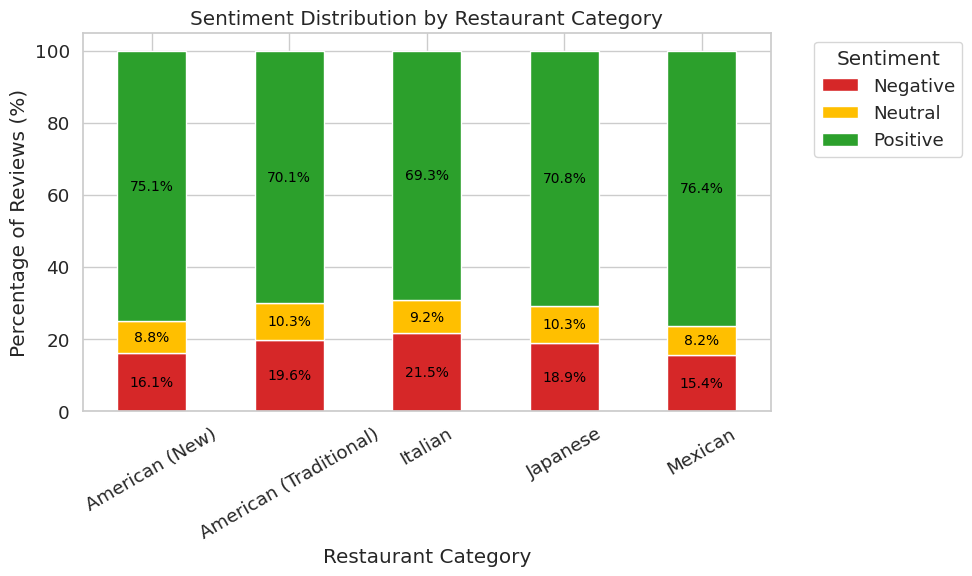

In [ ]:
# Count reviews by category + sentiment
sentiment_counts = (
    df.groupby(["categories_grouped", "sentiment_prediction2"])
      .size()
      .reset_index(name="count")
)

# Convert counts to percentages within each category
sentiment_counts["percent"] = (
    sentiment_counts["count"] /
    sentiment_counts.groupby("categories_grouped")["count"].transform("sum")
) * 100

sns.set(style="whitegrid", font_scale=1.2)

sentiment_order = ["Negative", "Neutral", "Positive"]
colors = ["#d62728", "#ffbf00", "#2ca02c"]

# Pivot for stacked bar plot
pivot_df = sentiment_counts.pivot(
    index="categories_grouped",
    columns="sentiment_prediction2",
    values="percent"
)

# Optional sentiment order
sentiment_order = ["Negative", "Neutral", "Positive"]
pivot_df = pivot_df[sentiment_order]

ax = pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color= colors
)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height >= 5:  # avoid clutter for very small segments
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",
                ha="center",
                va="center",
                fontsize=10,
                color="black"
            )

plt.ylabel("Percentage of Reviews (%)")
plt.xlabel("Restaurant Category")
plt.title("Sentiment Distribution by Restaurant Category")
plt.xticks(rotation=30)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.tight_layout()
plt.show()


## Word Cloud


In [ ]:
# Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text)      # remove extra whitespace
    return text

# Custom stopwords
from wordcloud import STOPWORDS
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "restaurant", "food", "place", "get", "like", "one", "good", "service",
    "also", "order", "came", "table", "went", "back", "santa", "barbara"
])

# Filter and clean reviews
mexican_positive = df[
    (df["categories_grouped"] == "Mexican") & (df["stars"] >= 4)
]["text"].dropna().apply(clean_text)

italian_negative = df[
    (df["categories_grouped"] == "Italian") & (df["stars"] <= 2)
]["text"].dropna().apply(clean_text)


def tfidf_top_words(text_series, max_features=100):
    vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(text_series)
    feature_array = vectorizer.get_feature_names_out()
    tfidf_sum = tfidf_matrix.sum(axis=0)
    scores = tfidf_sum.A1  # convert to 1D array
    tfidf_dict = dict(zip(feature_array, scores))
    return tfidf_dict

mexican_tfidf = tfidf_top_words(mexican_positive)
italian_tfidf = tfidf_top_words(italian_negative)

# Positive Mexican — Green
mexican_wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens"
).generate_from_frequencies(mexican_tfidf)

# Negative Italian — Red
italian_wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(italian_tfidf)

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.imshow(mexican_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews — Mexican Restaurants (≥4 Stars)", fontsize=22, fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(italian_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews — Italian Restaurants (≤2 Stars)", fontsize=22, fontweight="bold")


plt.tight_layout()
plt.show()
